<a href="https://colab.research.google.com/github/kidrono/Titanic-code/blob/main/titanic_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import csv
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
import sklearn
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import pdist,squareform
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from scipy.stats import ortho_group
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:

df = pd.read_csv('train.csv')
#df.PassengerId
y_train = np.array(df.Survived)
cl = np.array(df.Pclass)
Sex = np.array(df.Sex)
Sex_b = np.array([1 if Sex[i]=='male' else 0 for i in range(len(Sex))])

# read ticket number
T = df.Ticket
a = []
for i in range(len(y_train)):
    N = np.array([int(s) for s in T[i].split() if s.isdigit()])
    if len(N)>0:    
        a.append(N[0])
    else:
        a.append(0)
TN = np.array(a)

Age = np.array(df.Age)
# complete age array
Age[np.isnan(Age)]=np.mean(Age[Age>0])
Sib = np.array(df.SibSp)
Parch = np.array(df.Parch)
Fare = np.array(df.Fare)
em = np.array(df.Embarked)
em_b = np.array([1 if em[i]=='S' else 0 for i in range(len(Sex))])

#bin the prices
low_price=np.copy(Fare)
low_price[low_price<=8]=1
low_price[low_price!=1]=0

very_high=np.copy(Fare)
very_high[very_high>100]=1
very_high[very_high!=1]=0

second_class=np.copy(Fare)
second_class[second_class<=8]=0
second_class[second_class>30]=0
second_class[second_class!=0]=1

medium_class=np.copy(Fare)
medium_class[medium_class<=30]=0
medium_class[medium_class>100]=0
medium_class[medium_class!=0]=1




#replacing the Parch and sib columns to a col representing whether or not 
#one traveled alo
no_fam=Parch+Sib
no_fam[no_fam > 1] = 1
no_fam=no_fam*-1 +1

big_fam=Parch+Sib
big_fam[big_fam<=3]=0
big_fam[big_fam>3]=1

small_fam=Parch+Sib
small_fam[small_fam>3]=0
small_fam[small_fam>0]=1


#small kids had higher surviver rates so lets add a col of that info 
#than bining the age
is_toddler=np.copy(Age)
is_toddler[is_toddler<=6]=1
is_toddler[is_toddler>6]=0

child=np.copy(Age)
child[child<=6]=0
child[child>15]=0
child[child!=0]=1


teen=np.copy(Age)
teen[teen<=15]=0
teen[teen>20]=0
teen[teen!=0]=1

young_adult=np.copy(Age)
young_adult[young_adult<=20]=0
young_adult[young_adult>65]=0
young_adult[young_adult!=0]=1

# adult=np.copy(Age)
# adult[adult<=35]=0
# adult[adult>65]=0
# adult[adult!=0]=1

old=np.copy(Age)
old[old<=65]=0
old[old!=0]=1



#extracting the title from the name and finding the rare ones 
Title=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
Title=np.array(Title)
Title[Title=="Mrs"]='Miss'
Title[Title=="Lady"]='Miss'
Title[Title=="Ms"]='Miss'
Title[Title=="Mr"]='Miss'

Title =np.select([Title!= 'Miss'],['title'], Title)
Title[Title=='title']=1
Title[Title=='Miss']=0

#write info on cabin if avaliable
cabin = np.array(df.Cabin)
cabin[pd.isna(cabin)] = 0
cabin_b = np.array([1 if cabin[i] != 0 else 0 for i in range(len(Sex))])




# X_train = np.vstack((cl,Sex_b,TN,Age,Sib,Parch,Fare,em_b)).T

X_train = np.vstack((Sex_b, cl,is_toddler,child,teen, young_adult,old,no_fam,small_fam,big_fam,low_price,second_class,medium_class,very_high,em_b,Title,cabin_b)).T
# df_=pd.DataFrame(X_train, columns=['cl','Sex_b','Age','Toddler','no_fam','small','big','Fare','Fare1','fare2','fare3','fare4','em_b','title','cabin'])

# age_check=np.vstack((Age,is_toddler,child,teen, young_adult,adult,old)).T
# df_=pd.DataFrame(age_check,columns=['age','tod','child','teen','young','adult','old'])

Log_reg=LogisticRegression(solver='liblinear',random_state=0,penalty='l2')
Log_reg.fit(X_train,y_train)
print(Log_reg.score(X_train,y_train))




df = pd.read_csv('test.csv')
test_id = df.PassengerId
cl = np.array(df.Pclass)
Sex = np.array(df.Sex)
Sex_b = np.array([1 if Sex[i]=='male' else 0 for i in range(len(Sex))])
T = df.Ticket
a = []
for i in range(len(Sex)):
    N = np.array([int(s) for s in T[i].split() if s.isdigit()])
    if len(N)>0:    
        a.append(N[0])
    else:
        a.append(0)
TN = np.array(a)

Age = np.array(df.Age)
Age[np.isnan(Age)]=np.mean(Age[Age>0])
Sib = np.array(df.SibSp)
Parch = np.array(df.Parch)
Fare = np.array(df.Fare)
Fare[np.isnan(Fare)]=np.mean(Fare[Fare>0])
em = np.array(df.Embarked)
em_b = np.array([1 if em[i]=='S' else 0 for i in range(len(Sex))])


#bin the prices
low_price=np.copy(Fare)
low_price[low_price<=8]=1
low_price[low_price!=1]=0

very_high=np.copy(Fare)
very_high[very_high>100]=1
very_high[very_high!=1]=0

second_class=np.copy(Fare)
second_class[second_class<=8]=0
second_class[second_class>30]=0
second_class[second_class!=0]=1

medium_class=np.copy(Fare)
medium_class[medium_class<=30]=0
medium_class[medium_class>100]=0
medium_class[medium_class!=0]=1


#replacing the Parch and sib columns to a col representing whether or not 
#one traveled alo
no_fam=Parch+Sib
no_fam[no_fam > 1] = 1
no_fam=no_fam*-1 +1

big_fam=Parch+Sib
big_fam[big_fam<=3]=0
big_fam[big_fam>3]=1

small_fam=Parch+Sib
small_fam[small_fam>3]=0
small_fam[small_fam>0]=1


#small kids had higher surviver rates so lets add a col of that info 
is_toddler=np.copy(Age)
is_toddler[is_toddler<=6]=1
is_toddler[is_toddler>6]=0

child=np.copy(Age)
child[child<=6]=0
child[child>15]=0
child[child!=0]=1


teen=np.copy(Age)
teen[teen<=15]=0
teen[teen>20]=0
teen[teen!=0]=1

young_adult=np.copy(Age)
young_adult[young_adult<=20]=0
young_adult[young_adult>65]=0
young_adult[young_adult!=0]=1

# adult=np.copy(Age)
# adult[adult<=35]=0
# adult[adult>65]=0
# adult[adult!=0]=1

old=np.copy(Age)
old[old<=65]=0
old[old!=0]=1

#extracting the title from the name and finding the rare ones 
Title=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
Title=np.array(Title)
Title[Title=="Mrs"]='Miss'
Title[Title=="Lady"]='Miss'
Title[Title=="Ms"]='Miss'
Title[Title=="Mr"]='Miss'

Title =np.select([Title!= 'Miss'],['title'], Title)
Title[Title=='title']=1
Title[Title=='Miss']=0

#gives 1 if they have info on cabin
cabin = np.array(df.Cabin)
cabin[pd.isna(cabin)] = 0
cabin_b = np.array([1 if cabin[i] != 0 else 0 for i in range(len(Sex))])


X_upload = np.vstack((Sex_b, cl,is_toddler,child,teen, young_adult,old,no_fam,small_fam,big_fam,low_price,second_class,medium_class,very_high,em_b,Title,cabin_b)).T
# X_upload = np.vstack((cl,Sex_b,TN,Age,Family,Fare,em_b)).T


y_test_pred = Log_reg.predict(X_upload)
test_prediction = pd.DataFrame({'PassengerId': test_id,'Survived':y_test_pred})
# test_prediction.to_csv('submission_file.csv',index = False)



0.8271604938271605


In [ ]:
#gradient boodting

model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100,
                                max_depth=3, subsample=0.1,
                                max_features=0.5)

model = model.fit(X_train,y_train)
print(model.score(X_train,y_train))

y_test_pred = model.predict(X_upload)
test_prediction = pd.DataFrame({'PassengerId': test_id,'Survived':y_test_pred})
test_prediction.to_csv('boosting_res2.csv',index = False)



0.8338945005611672


In [ ]:
#gradient boodting best so far

model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30,
                                max_depth=3, subsample=0.1,
                                max_features=0.5)

model = model.fit(X_train,y_train)
print(model.score(X_train,y_train))

y_test_pred = model.predict(X_upload)
test_prediction = pd.DataFrame({'PassengerId': test_id,'Survived':y_test_pred})
test_prediction.to_csv('boosting_res5.csv',index = False)


0.8294051627384961


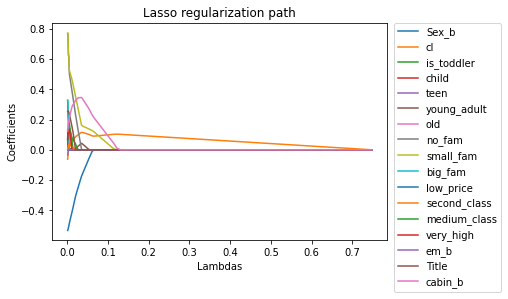

In [ ]:
#lasso path

from sklearn.linear_model import lasso_path

lambdas = [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1]
# _, coef_path, _ = lasso_path(X_train, y_train, alphas=lambdas)
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train)
coef_name = ['Sex_b', 'cl','is_toddler','child' ,'teen', 'young_adult','old',
             'no_fam','small_fam','big_fam','low_price','second_class',
             'medium_class','very_high','em_b','Title','cabin_b']
name_index = 0
for coef_l in coefs_lasso:
  # print(coef_name[name_index])
  # print(coef_l)
  l1 = plt.plot(alphas_lasso, coef_l, label=coef_name[name_index])
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  name_index += 1

plt.title("Lasso regularization path")
plt.xlabel("Lambdas")
plt.ylabel("Coefficients")
plt.show()

# import numpy as np

# from sklearn import linear_model
# from sklearn.svm import l1_min_c

# cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)

# clf = linear_model.LogisticRegression(
#     penalty="l1",
#     solver="liblinear",
#     tol=1e-6,
#     max_iter=int(1e6),
#     warm_start=True,
#     intercept_scaling=10000.0,
# )
# coefs_ = []
# for c in cs:
#     clf.set_params(C=c)
#     clf.fit(X_train, y_train)
#     coefs_.append(clf.coef_.ravel().copy())

# coefs_ = np.array(coefs_)

# print(coefs_)

In [ ]:
sklearn.linear_model.lasso_path(X_train, y_train)

(array([0.74859708, 0.69814414, 0.65109157, 0.60721017, 0.56628624,
        0.52812044, 0.49252689, 0.45933223, 0.42837477, 0.39950375,
        0.37257853, 0.34746799, 0.32404981, 0.30220993, 0.281842  ,
        0.26284679, 0.24513179, 0.22861073, 0.21320313, 0.19883396,
        0.18543321, 0.17293564, 0.16128035, 0.1504106 , 0.14027343,
        0.13081947, 0.12200267, 0.1137801 , 0.1061117 , 0.09896013,
        0.09229055, 0.08607047, 0.08026961, 0.07485971, 0.06981441,
        0.06510916, 0.06072102, 0.05662862, 0.05281204, 0.04925269,
        0.04593322, 0.04283748, 0.03995037, 0.03725785, 0.0347468 ,
        0.03240498, 0.03022099, 0.0281842 , 0.02628468, 0.02451318,
        0.02286107, 0.02132031, 0.0198834 , 0.01854332, 0.01729356,
        0.01612804, 0.01504106, 0.01402734, 0.01308195, 0.01220027,
        0.01137801, 0.01061117, 0.00989601, 0.00922905, 0.00860705,
        0.00802696, 0.00748597, 0.00698144, 0.00651092, 0.0060721 ,
        0.00566286, 0.0052812 , 0.00492527, 0.00